<a href="https://colab.research.google.com/github/MrRuicy/colab/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. 基础环境检测

import torch

# 检查是否可以使用 GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# 2. 创建不同类型的 Tensor
x = torch.tensor([1, 2, 3], dtype=torch.float32)  # float32 类型
y = torch.ones((2, 3))                # 全 1 的 2x3 Tensor
z = torch.zeros_like(y)                # 和 y 形状相同但全 0
print("x:", x)
print("y:", y)
print("z:", z)

# 3. 张量运算
a = x + 2
b = x * 3
c = a @ b        # @ 代表矩阵/向量乘法
print("a:", a)
print("b:", b)
print("c:", c)

# 4. 使用 GPU 计算
x_gpu = x.to(device)
print("x on GPU:", x_gpu)

# 5. 自动求导机制 autograd 基础
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)

# 构造简单的一元函数 f = w * x + b
x_input = torch.tensor([1.0, 2.0, 3.0])
f = w * x_input + b

# 计算损失（用均方误差）
loss = torch.mean((f - torch.tensor([2.0, 4.0, 6.0])) ** 2)
print("Loss:", loss.item())

# 自动求导
loss.backward()
print("w.grad:", w.grad)
print("b.grad:", b.grad)


Using device: cpu
x: tensor([1., 2., 3.])
y: tensor([[1., 1., 1.],
        [1., 1., 1.]])
z: tensor([[0., 0., 0.],
        [0., 0., 0.]])
a: tensor([3., 4., 5.])
b: tensor([3., 6., 9.])
c: tensor(78.)
x on GPU: tensor([1., 2., 3.])
Loss: 0.25
w.grad: tensor(2.)
b.grad: tensor(1.)


Using device: cpu
Epoch [10/100], Loss: 0.3809
Epoch [20/100], Loss: 0.1085
Epoch [30/100], Loss: 0.0581
Epoch [40/100], Loss: 0.0459
Epoch [50/100], Loss: 0.0429
Epoch [60/100], Loss: 0.0422
Epoch [70/100], Loss: 0.0420
Epoch [80/100], Loss: 0.0420
Epoch [90/100], Loss: 0.0420
Epoch [100/100], Loss: 0.0420


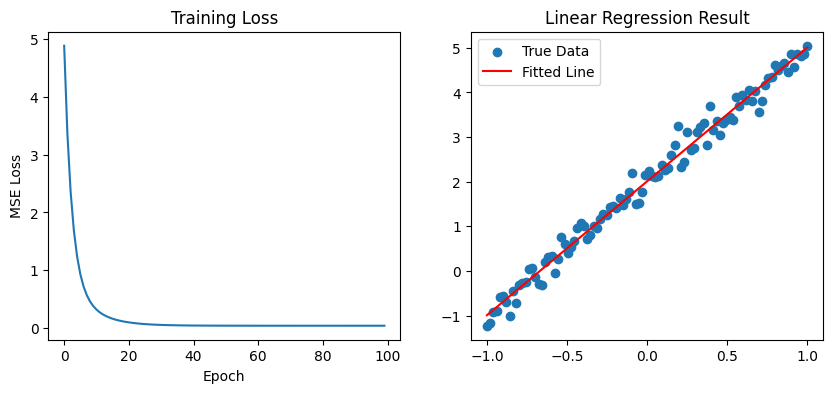

Learned weight: 2.9983, bias: 2.0074


In [3]:
# ========== 1. 导入库 ==========
import torch
import matplotlib.pyplot as plt

# 使用 GPU（如果可用）
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ========== 2. 数据准备 ==========
# 生成一个简单的线性数据 y = 3x + 2 + 噪声
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 3 * X + 2 + 0.2 * torch.randn(X.size())

# 转移到设备（GPU/CPU）
X, y = X.to(device), y.to(device)

# ========== 3. 模型定义 ==========
# 参数 w 和 b，设置为需要求导
w = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)

# 定义前向传播
def forward(x):
    return w * x + b

# ========== 4. 超参数 ==========
learning_rate = 0.1
epochs = 100

# ========== 5. 训练过程 ==========
loss_history = []

for epoch in range(epochs):
    # 前向传播
    y_pred = forward(X)
    loss = torch.mean((y_pred - y) ** 2)  # MSE Loss

    # 反向传播
    loss.backward()

    # 参数更新
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 清零梯度
    w.grad.zero_()
    b.grad.zero_()

    # 记录损失
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# ========== 6. 可视化结果 ==========
plt.figure(figsize=(10, 4))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

# 拟合曲线
plt.subplot(1, 2, 2)
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='True Data')
plt.plot(X.cpu().numpy(), forward(X).detach().cpu().numpy(), color='red', label='Fitted Line')
plt.title("Linear Regression Result")
plt.legend()

plt.show()

print(f"Learned weight: {w.item():.4f}, bias: {b.item():.4f}")
